## Pandas Tutorial for beginers

Dataframe id made up of series. series is array like structure. Column attributes are the keys of dictionary

https://www.tutorialspoint.com/python_pandas/python_pandas_caveats_and_gotchas.htm

In [2]:
import pandas as pd
import numpy as np

#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)
print (df)

    Age    Name  Rating
0    25     Tom    4.23
1    26   James    3.24
2    25   Ricky    3.98
3    23     Vin    2.56
4    30   Steve    3.20
5    29   Smith    4.60
6    23    Jack    3.80
7    34     Lee    3.78
8    40   David    2.98
9    30  Gasper    4.80
10   51  Betina    4.10
11   46  Andres    3.65


In [3]:
print (df.sum())

Age                                                     382
Name      TomJamesRickyVinSteveSmithJackLeeDavidGasperBe...
Rating                                                44.92
dtype: object


In [4]:
print (df.sum(1))

0     29.23
1     29.24
2     28.98
3     25.56
4     33.20
5     33.60
6     26.80
7     37.78
8     42.98
9     34.80
10    55.10
11    49.65
dtype: float64


In [5]:
print (df.mean())


Age       31.833333
Rating     3.743333
dtype: float64


In [6]:
print (df.std())

Age       9.232682
Rating    0.661628
dtype: float64


In [7]:
print (df.describe())

             Age     Rating
count  12.000000  12.000000
mean   31.833333   3.743333
std     9.232682   0.661628
min    23.000000   2.560000
25%    25.000000   3.230000
50%    29.500000   3.790000
75%    35.500000   4.132500
max    51.000000   4.800000


In [8]:
print (df.describe(include=['object']))
print (df.describe(include=['number'])) #all

          Name
count       12
unique      12
top     Betina
freq         1
             Age     Rating
count  12.000000  12.000000
mean   31.833333   3.743333
std     9.232682   0.661628
min    23.000000   2.560000
25%    25.000000   3.230000
50%    29.500000   3.790000
75%    35.500000   4.132500
max    51.000000   4.800000


In [9]:
print (df.describe(include='all'))

              Age    Name     Rating
count   12.000000      12  12.000000
unique        NaN      12        NaN
top           NaN  Betina        NaN
freq          NaN       1        NaN
mean    31.833333     NaN   3.743333
std      9.232682     NaN   0.661628
min     23.000000     NaN   2.560000
25%     25.000000     NaN   3.230000
50%     29.500000     NaN   3.790000
75%     35.500000     NaN   4.132500
max     51.000000     NaN   4.800000


### For tablewise operation use Pipe method
### For row wise and column operation use apply method. axis=0 for column and axis=1 for row 
### applymap() on DataFrame and map() on Series

In [10]:
##Table-wise operation
def adder(ele1,ele2):
   return ele1+ele2

df_tablewise = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print("Original table : \n {} " .format(df_tablewise))
print("\n After adding 2 by tablewise operation")

print (df_tablewise.pipe(adder,2))

Original table : 
        col1      col2      col3
0 -0.090217  2.695045 -0.376356
1  0.582716  0.370650  1.189880
2  0.885644 -0.111126 -0.789732
3  1.146273  1.793435  0.606564
4  0.439006  0.633028 -0.385716 

 After adding 2 by tablewise operation
       col1      col2      col3
0  1.909783  4.695045  1.623644
1  2.582716  2.370650  3.189880
2  2.885644  1.888874  1.210268
3  3.146273  3.793435  2.606564
4  2.439006  2.633028  1.614284


In [11]:
## Row or Column Wise Function Application##

df_columnwise = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print (df_columnwise)
print (df_columnwise.apply(np.mean)) #provided that data should be numbers
#print (df.apply(np.mean))

       col1      col2      col3
0  1.100540 -1.600753 -0.478333
1 -1.518344  1.038498 -0.465848
2 -0.477057  1.911725 -0.373851
3  0.983516  0.922755 -0.208105
4  0.373201 -0.819358  0.064358
col1    0.092371
col2    0.290573
col3   -0.292356
dtype: float64


In [12]:
df_rowwise = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print (df_rowwise)
print (df_rowwise.apply(np.mean, axis=1)) # axis=0 for columnwise nad axis =1 for rowwise
#print (df.apply(np.mean))

       col1      col2      col3
0 -1.088518  0.211017  1.729459
1  1.996009  0.125592 -0.430946
2  1.288155  1.598405 -0.432954
3 -0.770194  0.220906 -0.406921
4 -2.195130 -0.109077 -1.990317
0    0.283986
1    0.563552
2    0.817869
3   -0.318736
4   -1.431508
dtype: float64


In [13]:

df_elementwise = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
print (df_elementwise)
# My custom function
op=df_elementwise.applymap(lambda x:x*100)
print (op)
print (op.apply(np.mean))
df_elementwise['col1'].map(lambda x:x*100)

       col1      col2      col3
0 -0.681562  0.103267 -1.758597
1 -0.239517  2.119926 -1.906390
2  0.841591 -1.268436 -1.521041
3 -0.513057 -0.062581  1.515241
4  0.760264 -0.876782  0.633581
        col1        col2        col3
0 -68.156163   10.326747 -175.859706
1 -23.951723  211.992628 -190.638962
2  84.159074 -126.843628 -152.104099
3 -51.305677   -6.258117  151.524081
4  76.026438  -87.678195   63.358141
col1     3.354390
col2     0.307887
col3   -60.744109
dtype: float64


0   -68.156163
1   -23.951723
2    84.159074
3   -51.305677
4    76.026438
Name: col1, dtype: float64

In [14]:
import pandas as pd
import numpy as np

N=20

df_reindex = pd.DataFrame({
   'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
   'x': np.linspace(0,stop=N-1,num=N),
   'y': np.random.rand(N),
   'C': np.random.choice(['Low','Medium','High'],N).tolist(),
   'D': np.random.normal(100, 10, size=(N)).tolist()
})
print(df_reindex)

#reindex the DataFrame
df_reindexed =df_reindex.reindex(index=[0,2,5], columns=['A', 'C', 'B'])

print (df_reindexed)


            A       C           D     x         y
0  2016-01-01    High  100.643373   0.0  0.511131
1  2016-01-02  Medium  108.581292   1.0  0.001283
2  2016-01-03  Medium   96.751823   2.0  0.818533
3  2016-01-04  Medium  105.848012   3.0  0.540795
4  2016-01-05  Medium   96.826111   4.0  0.058898
5  2016-01-06     Low   92.705612   5.0  0.626541
6  2016-01-07  Medium   96.131750   6.0  0.960543
7  2016-01-08    High   87.629541   7.0  0.448567
8  2016-01-09  Medium  105.285799   8.0  0.545246
9  2016-01-10     Low   97.922877   9.0  0.644142
10 2016-01-11     Low  108.723102  10.0  0.481546
11 2016-01-12    High  116.668950  11.0  0.063671
12 2016-01-13  Medium  110.322222  12.0  0.262700
13 2016-01-14     Low  117.041478  13.0  0.358760
14 2016-01-15     Low   89.992169  14.0  0.507247
15 2016-01-16  Medium  110.317834  15.0  0.288633
16 2016-01-17  Medium  101.453538  16.0  0.167449
17 2016-01-18    High  122.123260  17.0  0.026753
18 2016-01-19    High   99.367405  18.0  0.030646


In [15]:


df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])
print(df1)
print(df2)
df1 = df1.reindex_like(df2)
print (df1)

       col1      col2      col3
0 -1.645804 -0.744685  0.854365
1 -1.124161 -0.640525 -0.398708
2  0.496494  0.080720 -1.321825
3  0.524631 -0.516820 -0.937857
4 -0.791926  1.609062  0.252623
5 -0.055080  0.504395  0.174971
6  0.956794 -0.373322 -1.922671
7  1.267372 -0.641199 -0.009544
8  1.467718 -1.441405  1.609548
9 -1.660814  1.958017 -0.691134
       col1      col2      col3
0  0.473949  0.278691  0.264434
1  0.115384 -1.132005 -0.010719
2  0.480896 -0.696112  1.138208
3 -0.791644 -0.491852 -1.229566
4 -1.380360 -1.762930 -0.304683
5 -1.412080 -0.510061  0.341065
6 -0.851643 -0.606486 -1.615576
       col1      col2      col3
0 -1.645804 -0.744685  0.854365
1 -1.124161 -0.640525 -0.398708
2  0.496494  0.080720 -1.321825
3  0.524631 -0.516820 -0.937857
4 -0.791926  1.609062  0.252623
5 -0.055080  0.504395  0.174971
6  0.956794 -0.373322 -1.922671


In [16]:
df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])

# Padding NAN's
print (df2.reindex_like(df1))

# Now Fill the NAN's with preceding Values
print ("Data Frame with Forward Fill:")
print (df2.reindex_like(df1,method='bfill', limit=1)) #limit 1 indicate fill only 1 row

       col1      col2      col3
0 -0.412307 -1.437887  0.510593
1  0.868962  0.237250  1.548757
2 -0.495618  0.085149 -0.781806
3 -0.126727 -0.332800  0.348392
4 -1.256377  0.185931 -0.053665
5 -0.090520  1.304386  0.065028
6  1.711249 -0.027248  0.021148
7       NaN       NaN       NaN
8       NaN       NaN       NaN
9       NaN       NaN       NaN
Data Frame with Forward Fill:
       col1      col2      col3
0 -0.412307 -1.437887  0.510593
1  0.868962  0.237250  1.548757
2 -0.495618  0.085149 -0.781806
3 -0.126727 -0.332800  0.348392
4 -1.256377  0.185931 -0.053665
5 -0.090520  1.304386  0.065028
6  1.711249 -0.027248  0.021148
7       NaN       NaN       NaN
8       NaN       NaN       NaN
9       NaN       NaN       NaN


In [17]:


df1 = pd.DataFrame(np.random.randn(6,3),columns=['col1','col2','col3'])
print (df1)

print ("After renaming the rows and columns:")
print (df1.rename(columns={'col1' : 'c1', 'col2' : 'c2'},
index = {0 : 'apple', 1 : 'banana', 2 : 'durian'}))

       col1      col2      col3
0 -0.080258  1.325088  1.040284
1 -1.145130 -1.666996  0.055101
2 -0.661714  0.743855 -0.084741
3 -1.025140  0.347018 -1.922492
4  0.653690 -0.971849  1.807065
5 -0.499134  0.296926 -1.007989
After renaming the rows and columns:
              c1        c2      col3
apple  -0.080258  1.325088  1.040284
banana -1.145130 -1.666996  0.055101
durian -0.661714  0.743855 -0.084741
3      -1.025140  0.347018 -1.922492
4       0.653690 -0.971849  1.807065
5      -0.499134  0.296926 -1.007989


### Iterating a DataFrame

In [17]:
## Three methods 1. iteritems, iterrows, itertuples
 
N=20

df = pd.DataFrame({
    'A': pd.date_range(start='2016-01-01',periods=N,freq='D'),
    'x': np.linspace(0,stop=N-1,num=N),
    'y': np.random.rand(N),
    'C': np.random.choice(['Low','Medium','High'],N).tolist(),
    'D': np.random.normal(100, 10, size=(N)).tolist()
    })
print(df)
for col in df:
   print (col)

            A       C           D     x         y
0  2016-01-01     Low   84.883378   0.0  0.567720
1  2016-01-02  Medium   95.580244   1.0  0.997350
2  2016-01-03     Low  107.119287   2.0  0.899794
3  2016-01-04    High   95.251726   3.0  0.815979
4  2016-01-05  Medium  104.306719   4.0  0.463980
5  2016-01-06    High   90.789083   5.0  0.363042
6  2016-01-07     Low   93.480242   6.0  0.786905
7  2016-01-08  Medium  102.709582   7.0  0.057324
8  2016-01-09     Low  115.461281   8.0  0.774065
9  2016-01-10     Low  102.897640   9.0  0.474180
10 2016-01-11     Low  100.695084  10.0  0.465272
11 2016-01-12    High  103.751359  11.0  0.529568
12 2016-01-13  Medium   93.150592  12.0  0.682109
13 2016-01-14  Medium   91.875674  13.0  0.381299
14 2016-01-15     Low  107.861015  14.0  0.547584
15 2016-01-16     Low  106.786716  15.0  0.155357
16 2016-01-17  Medium  114.870966  16.0  0.686068
17 2016-01-18     Low  101.977740  17.0  0.176387
18 2016-01-19    High   89.155408  18.0  0.154651


In [18]:
### Row wise iterate 
df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
print(df)
for key,value in df.iteritems():
   print (key,"\n",value)
   #print (type(value)) ## returns pandas series

       col1      col2      col3
0 -0.594654  2.054347 -1.460871
1 -0.187123  0.828912  1.492345
2  2.217929  0.665804 -0.345382
3 -0.194698 -0.098465 -1.529098
col1 
 0   -0.594654
1   -0.187123
2    2.217929
3   -0.194698
Name: col1, dtype: float64
col2 
 0    2.054347
1    0.828912
2    0.665804
3   -0.098465
Name: col2, dtype: float64
col3 
 0   -1.460871
1    1.492345
2   -0.345382
3   -1.529098
Name: col3, dtype: float64


In [19]:
df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
for row_index,row in df.iterrows():
   print (row_index,row)
   #print (type(row)) # pandas series

0 col1   -0.257890
col2   -0.054964
col3   -0.751792
Name: 0, dtype: float64
1 col1    2.778987
col2   -0.458964
col3    0.155592
Name: 1, dtype: float64
2 col1    0.611758
col2   -0.543063
col3   -0.545756
Name: 2, dtype: float64
3 col1    1.274010
col2    0.450269
col3   -1.140190
Name: 3, dtype: float64


In [20]:
df = pd.DataFrame(np.random.randn(4,3),columns = ['col1','col2','col3'])
for row in df.itertuples():
    print (row)
    #print(type(row)) returns list 

Pandas(Index=0, col1=0.9923058217911901, col2=-1.7342858988278416, col3=-0.5843623481436702)
Pandas(Index=1, col1=1.408743046704375, col2=0.5266271510103488, col3=0.33229571182073003)
Pandas(Index=2, col1=-0.5879607779970969, col2=-0.05870549512392791, col3=-1.7540023948233756)
Pandas(Index=3, col1=0.03168187222139993, col2=0.5200611886312895, col3=0.5966823256521085)


In [21]:
##Python Pandas - Sorting
## methods 1. by index 2. by actual values
unsorted_df=pd.DataFrame(np.random.randn(10,2),index=[1,4,6,2,3,5,9,8,0,7],columns=['col2','col1'])
print (unsorted_df)

       col2      col1
1  0.866470 -0.750190
4 -1.734987  1.711044
6 -0.802886 -0.210852
2 -1.671852  0.149286
3 -0.371271  0.452764
5 -0.449714 -1.208496
9 -0.587779 -0.161953
8  0.861039  0.724994
0  2.659544  1.009009
7  1.295947 -0.960772


In [22]:
sorted_df=unsorted_df.sort_index()
print (sorted_df)

       col2      col1
0  2.659544  1.009009
1  0.866470 -0.750190
2 -1.671852  0.149286
3 -0.371271  0.452764
4 -1.734987  1.711044
5 -0.449714 -1.208496
6 -0.802886 -0.210852
7  1.295947 -0.960772
8  0.861039  0.724994
9 -0.587779 -0.161953


In [23]:
##order of sorting
sorted_df = unsorted_df.sort_index(ascending=False)
print (sorted_df)

       col2      col1
9 -0.587779 -0.161953
8  0.861039  0.724994
7  1.295947 -0.960772
6 -0.802886 -0.210852
5 -0.449714 -1.208496
4 -1.734987  1.711044
3 -0.371271  0.452764
2 -1.671852  0.149286
1  0.866470 -0.750190
0  2.659544  1.009009


In [24]:
print (unsorted_df)
sorted_df=unsorted_df.sort_index(axis=1)# by default axis=0 hence column wise sorting

print (sorted_df)

       col2      col1
1  0.866470 -0.750190
4 -1.734987  1.711044
6 -0.802886 -0.210852
2 -1.671852  0.149286
3 -0.371271  0.452764
5 -0.449714 -1.208496
9 -0.587779 -0.161953
8  0.861039  0.724994
0  2.659544  1.009009
7  1.295947 -0.960772
       col1      col2
1 -0.750190  0.866470
4  1.711044 -1.734987
6 -0.210852 -0.802886
2  0.149286 -1.671852
3  0.452764 -0.371271
5 -1.208496 -0.449714
9 -0.161953 -0.587779
8  0.724994  0.861039
0  1.009009  2.659544
7 -0.960772  1.295947


In [25]:
## sorting by value
unsorted_df = pd.DataFrame({'col1':[2,1,1,1],'col2':[1,3,2,4]})
sorted_df = unsorted_df.sort_values(by='col1')
print (unsorted_df)
print (sorted_df)

sorted_df = unsorted_df.sort_values(by='col1' ,kind='mergesort')

print (sorted_df)

   col1  col2
0     2     1
1     1     3
2     1     2
3     1     4
   col1  col2
1     1     3
2     1     2
3     1     4
0     2     1
   col1  col2
1     1     3
2     1     2
3     1     4
0     2     1


In [26]:
###Pandas provide API e.g displays its relevant functions are:
## get_option()set_option() reset_option() describe_option() option_context()
## Default max values for row and column display
print (pd.get_option("display.max_rows"))
print (pd.get_option("display.max_columns"))
print("\n")
pd.set_option("display.max_rows",90)
pd.set_option("display.max_columns",45)
print (pd.get_option("display.max_rows"))
print (pd.get_option("display.max_columns"))
print("\n")
pd.reset_option("display.max_rows") ## reset to default values
pd.reset_option("display.max_columns") ## reset to default values
print (pd.get_option("display.max_rows"))
print (pd.get_option("display.max_columns"))

print("\n")
with pd.option_context("display.max_rows",10): ##temporory set
   print(pd.get_option("display.max_rows"))   
   print(pd.get_option("display.max_columns"))


60
20


90
45


60
20


10
20


## Python Pandas - Indexing and Selecting Data
 loc()  -->	Label based
.iloc() -->	Integer based
.ix()   -->	Both Label and Integer based

In [27]:
## Label based
df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])
print(df)
#select all rows for a specific column
print (df.loc[:,'A'])

# Select all rows for multiple columns, say list[]
print (df.loc[:,['A','C']])

# Select few rows for multiple columns, say list[]
print (df.loc[['a','b','f','h'],['A','C']])

# Select range of rows for all columns
print (df.loc['a':'f'])

# for getting values with a boolean array
print (df.loc['a']>0)


          A         B         C         D
a  1.402412 -1.183152  0.284390  0.806553
b -0.047609 -0.077516  0.666420  0.530834
c -0.692509 -1.017303 -2.044855  0.650715
d  0.002971  0.631506  1.171653 -0.090197
e -0.611649 -0.975269  0.700286  0.860253
f -2.095869  0.637850 -1.387936 -0.931508
g  0.851751 -0.065273  1.176671 -0.879899
h  1.015113  1.124879 -1.116327 -0.887580
a    1.402412
b   -0.047609
c   -0.692509
d    0.002971
e   -0.611649
f   -2.095869
g    0.851751
h    1.015113
Name: A, dtype: float64
          A         C
a  1.402412  0.284390
b -0.047609  0.666420
c -0.692509 -2.044855
d  0.002971  1.171653
e -0.611649  0.700286
f -2.095869 -1.387936
g  0.851751  1.176671
h  1.015113 -1.116327
          A         C
a  1.402412  0.284390
b -0.047609  0.666420
f -2.095869 -1.387936
h  1.015113 -1.116327
          A         B         C         D
a  1.402412 -1.183152  0.284390  0.806553
b -0.047609 -0.077516  0.666420  0.530834
c -0.692509 -1.017303 -2.044855  0.650715
d  0.00297

In [28]:
#integer based. #Like python and numpy, these are 0-based indexing.
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
print(df)
# select all rows for a specific column
print (df.iloc[:4])
print (df.iloc[1:5, 2:4])

# Slicing through list of values
print (df.iloc[[1, 3, 5], [1, 3]])
print (df.iloc[1:3, :])
print (df.iloc[:,1:3])
print("\n hybrid approach")
##hyrid approach ## depreceated warning, use loc and iloc only
# Integer slicing
print (df.ix[:3]) ## considers 3rd element also. strange but reality ## 
# Index slicing
print (df.ix[:,'A']) 

          A         B         C         D
0  1.267687  0.469517 -0.985060  0.580649
1 -1.930533  0.183349 -0.261794 -0.350174
2  2.356305  0.000216 -1.033504  1.062746
3  1.272449 -0.958698  0.315126  0.331979
4  0.901538 -0.475393 -0.636202 -1.407418
5 -0.215733 -0.840610  1.151833  0.291566
6 -0.142487  3.304620  0.452781  1.005568
7  1.318033 -1.020508  0.692703 -0.001311
          A         B         C         D
0  1.267687  0.469517 -0.985060  0.580649
1 -1.930533  0.183349 -0.261794 -0.350174
2  2.356305  0.000216 -1.033504  1.062746
3  1.272449 -0.958698  0.315126  0.331979
          C         D
1 -0.261794 -0.350174
2 -1.033504  1.062746
3  0.315126  0.331979
4 -0.636202 -1.407418
          B         D
1  0.183349 -0.350174
3 -0.958698  0.331979
5 -0.840610  0.291566
          A         B         C         D
1 -1.930533  0.183349 -0.261794 -0.350174
2  2.356305  0.000216 -1.033504  1.062746
          B         C
0  0.469517 -0.985060
1  0.183349 -0.261794
2  0.000216 -1.033504


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [29]:
## use of notations
print (df[['A','B']])
## attribute access
print (df.A)


          A         B
0  1.267687  0.469517
1 -1.930533  0.183349
2  2.356305  0.000216
3  1.272449 -0.958698
4  0.901538 -0.475393
5 -0.215733 -0.840610
6 -0.142487  3.304620
7  1.318033 -1.020508
0    1.267687
1   -1.930533
2    2.356305
3    1.272449
4    0.901538
5   -0.215733
6   -0.142487
7    1.318033
Name: A, dtype: float64


In [30]:
###Python Pandas - Statistical Functions

s = pd.Series([12,3,4,5,4])
print (s.pct_change()) ## percent change w.r.t. previous element/100

df = pd.DataFrame(np.random.randn(5, 2))
print (df)
print (df.pct_change(axis=0)) # by default axis=0 for column wise for row wise axis=1



0         NaN
1   -0.750000
2    0.333333
3    0.250000
4   -0.200000
dtype: float64
          0         1
0  0.238346  0.194158
1  0.793583  1.378230
2  0.342026 -0.282662
3  1.259856 -0.082271
4  1.228216 -0.421827
          0         1
0       NaN       NaN
1  2.329543  6.098504
2 -0.569011 -1.205091
3  2.683513 -0.708941
4 -0.025114  4.127273


In [31]:
###Co-variance
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print (s1.cov(s2))

0.1946773049373767


In [32]:
frame = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
print (frame['a'].cov(frame['b'])) #covariance between a and b series
print (frame.cov()) #complete covariance

-0.11335207197842921
          a         b         c         d         e
a  0.303356 -0.113352  0.192232  0.011148  0.215677
b -0.113352  0.626190 -0.207928  0.378321  0.000645
c  0.192232 -0.207928  0.878249 -0.033852  0.364290
d  0.011148  0.378321 -0.033852  1.318340 -0.046026
e  0.215677  0.000645  0.364290 -0.046026  0.429524


In [33]:
## co-relation
print (frame['a'].corr(frame['b']))

print (frame.corr())

-0.2600759370538155
          a         b         c         d         e
a  1.000000 -0.260076  0.372426  0.017628  0.597494
b -0.260076  1.000000 -0.280383  0.416384  0.001244
c  0.372426 -0.280383  1.000000 -0.031460  0.593123
d  0.017628  0.416384 -0.031460  1.000000 -0.061163
e  0.597494  0.001244  0.593123 -0.061163  1.000000


In [34]:
## python windows function
##Window functions are majorly used in finding the trends within the data
df = pd.DataFrame(np.random.randn(10, 4),
index = pd.date_range('1/1/2000', periods=10),
columns = ['A', 'B', 'C', 'D'])
print(df)
print("\n after rolling window with size 3")
print (df.rolling(window=3).mean())

print("\n after expanding min period  3")
print (df.expanding(min_periods=3).mean())

print("\n after assigining weight exponentially")
print (df.ewm(com=0.5).mean())

                   A         B         C         D
2000-01-01  1.493419 -0.736001  1.797969 -1.021867
2000-01-02 -1.080194  0.313330  0.001147 -0.439221
2000-01-03  0.202630 -0.028713 -0.333047 -2.462732
2000-01-04  1.626157 -0.758026 -0.294098  2.351020
2000-01-05  0.244600 -1.384653  0.955698  0.269793
2000-01-06  1.421067 -0.167095 -0.055275  2.336526
2000-01-07  0.390499 -1.225220  1.057395  0.368475
2000-01-08  0.337469  0.537531 -0.747739  0.631565
2000-01-09  1.908130  0.411438 -0.400539  0.709538
2000-01-10  0.330671 -0.582459 -0.945120  0.346121

 after rolling window with size 3
                   A         B         C         D
2000-01-01       NaN       NaN       NaN       NaN
2000-01-02       NaN       NaN       NaN       NaN
2000-01-03  0.205285 -0.150461  0.488690 -1.307940
2000-01-04  0.249531 -0.157803 -0.208666 -0.183644
2000-01-05  0.691129 -0.723797  0.109518  0.052693
2000-01-06  1.097275 -0.769925  0.202108  1.652446
2000-01-07  0.685389 -0.925656  0.652606  0.991

In [35]:
### Missing values NaN

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print (df)
## check for missing values
## two methos notnull isnull
print (df['one'].isnull())

print (df['one'].notnull())

print("\n sum: ") 
print (df['one'].sum()) # treats NaN values as zero 
# If  data are all NA, then result will b NA

### Cleaning / Filling Missing Data
print (df.fillna(0)) # fill nan with zeros

## pad/fill --> Fill methods Forward fill
## bfill/backfill --> Fill methods Backward

print (df.fillna(method='bfill'))
print (df.dropna()) ## drop mising values
print (df.dropna(axis=1))

        one       two     three
a  0.600254 -0.353734 -0.255404
b       NaN       NaN       NaN
c  1.106098 -0.042151  0.455281
d       NaN       NaN       NaN
e  0.523421  0.695181 -2.064942
f -0.378520 -1.069862  0.535168
g       NaN       NaN       NaN
h -2.123964  0.676466 -0.423000
a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool
a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

 sum: 
-0.27271054837173536
        one       two     three
a  0.600254 -0.353734 -0.255404
b  0.000000  0.000000  0.000000
c  1.106098 -0.042151  0.455281
d  0.000000  0.000000  0.000000
e  0.523421  0.695181 -2.064942
f -0.378520 -1.069862  0.535168
g  0.000000  0.000000  0.000000
h -2.123964  0.676466 -0.423000
        one       two     three
a  0.600254 -0.353734 -0.255404
b  1.106098 -0.042151  0.455281
c  1.106098 -0.042151  0.455281
d  0.523421  0.695181 -2.064942
e  0.523421  

In [36]:
## replacing missing or generic values
df = pd.DataFrame({'one':[10,20,30,40,50,2000],
'two':[1000,0,30,40,50,60]})
print (df.replace({1000:10,2000:60}))

   one  two
0   10   10
1   20    0
2   30   30
3   40   40
4   50   50
5   60   60


In [37]:
### Split Data into Groups ##Groupby ## remaining to study
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df)
print ('\n result')
print (df.groupby('Team'))

print (df.groupby('Team').groups)

    Points  Rank    Team  Year
0      876     1  Riders  2014
1      789     2  Riders  2015
2      863     2  Devils  2014
3      673     3  Devils  2015
4      741     3   Kings  2014
5      812     4   kings  2015
6      756     1   Kings  2016
7      788     1   Kings  2017
8      694     2  Riders  2016
9      701     4  Royals  2014
10     804     1  Royals  2015
11     690     2  Riders  2017

 result
{'Riders': Int64Index([0, 1, 8, 11], dtype='int64'), 'Devils': Int64Index([2, 3], dtype='int64'), 'Kings': Int64Index([4, 6, 7], dtype='int64'), 'Royals': Int64Index([9, 10], dtype='int64'), 'kings': Int64Index([5], dtype='int64')}


In [38]:
##Python Pandas - Merging/Joining

left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})
print (left)
print (right)

print (pd.merge(left,right,on='id'))

     Name  id subject_id
0    Alex   1       sub1
1     Amy   2       sub2
2   Allen   3       sub4
3   Alice   4       sub6
4  Ayoung   5       sub5
    Name  id subject_id
0  Billy   1       sub2
1  Brian   2       sub4
2   Bran   3       sub3
3  Bryce   4       sub6
4  Betty   5       sub5
   Name_x  id subject_id_x Name_y subject_id_y
0    Alex   1         sub1  Billy         sub2
1     Amy   2         sub2  Brian         sub4
2   Allen   3         sub4   Bran         sub3
3   Alice   4         sub6  Bryce         sub6
4  Ayoung   5         sub5  Betty         sub5


In [39]:
print (pd.merge(left,right,on=['id','subject_id'])) ## here id n sub id matches merged

   Name_x  id subject_id Name_y
0   Alice   4       sub6  Bryce
1  Ayoung   5       sub5  Betty


In [40]:
#Methods of merging how= left right, outer, inner
print (pd.merge(left, right, on=['id','subject_id'], how='left'))

   Name_x  id subject_id Name_y
0    Alex   1       sub1    NaN
1     Amy   2       sub2    NaN
2   Allen   3       sub4    NaN
3   Alice   4       sub6  Bryce
4  Ayoung   5       sub5  Betty


As matches for 0 1 2 entry is not possible NaN are added

In [41]:
## Concat two dataframes

one = pd.DataFrame({
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5'],
         'Marks_scored':[98,90,87,69,78]},
         index=[1,2,3,4,5])
two = pd.DataFrame({
         'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5'],
         'Marks_scored':[89,80,79,97,88]},
         index=[1,2,3,4,5])
print (pd.concat([one,two]))
print("\n concat with keys")
print (pd.concat([one,two],keys=['x','y']))


   Marks_scored    Name subject_id
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
1            89   Billy       sub2
2            80   Brian       sub4
3            79    Bran       sub3
4            97   Bryce       sub6
5            88   Betty       sub5

 concat with keys
     Marks_scored    Name subject_id
x 1            98    Alex       sub1
  2            90     Amy       sub2
  3            87   Allen       sub4
  4            69   Alice       sub6
  5            78  Ayoung       sub5
y 1            89   Billy       sub2
  2            80   Brian       sub4
  3            79    Bran       sub3
  4            97   Bryce       sub6
  5            88   Betty       sub5


In [42]:
#resultant object has to follow its own indexing, set ignore_index to True.
print (pd.concat([one,two],keys=['x','y'],ignore_index=True))

print (pd.concat([one,two],axis=1)) ## concat along rows 
print (one.append(two)) ## concat using append and default axis=0

   Marks_scored    Name subject_id
0            98    Alex       sub1
1            90     Amy       sub2
2            87   Allen       sub4
3            69   Alice       sub6
4            78  Ayoung       sub5
5            89   Billy       sub2
6            80   Brian       sub4
7            79    Bran       sub3
8            97   Bryce       sub6
9            88   Betty       sub5
   Marks_scored    Name subject_id  Marks_scored   Name subject_id
1            98    Alex       sub1            89  Billy       sub2
2            90     Amy       sub2            80  Brian       sub4
3            87   Allen       sub4            79   Bran       sub3
4            69   Alice       sub6            97  Bryce       sub6
5            78  Ayoung       sub5            88  Betty       sub5
   Marks_scored    Name subject_id
1            98    Alex       sub1
2            90     Amy       sub2
3            87   Allen       sub4
4            69   Alice       sub6
5            78  Ayoung       sub5
1  

In [43]:
print (pd.datetime.now()) ## remaining part here

2018-12-18 11:33:41.194469


In [44]:
### Pandas categorical ### overlook remaining
s = pd.Series(["a","b","c","a"], dtype="category")
print (s)

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]


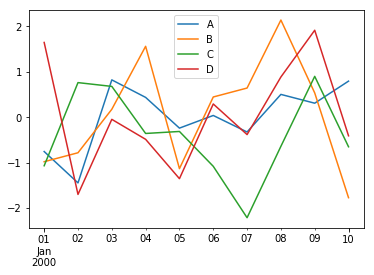

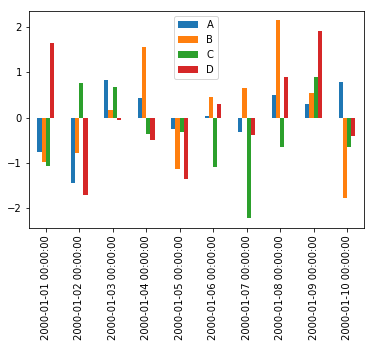

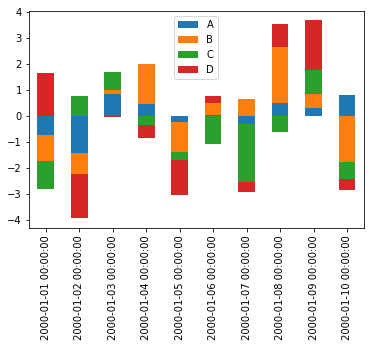

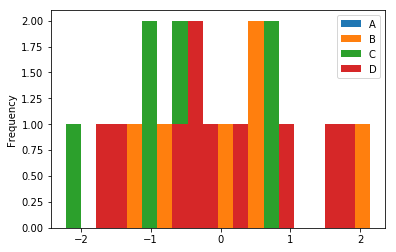

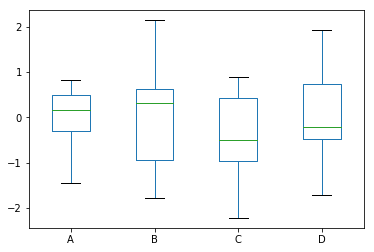

In [45]:
### Visualization pandas
df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2000',
   periods=10), columns=list('ABCD'))
%matplotlib inline
df.plot()
df.plot.bar()
df.plot.bar(stacked=True)
df.plot.hist(bins=20)
df.plot.box()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4694054978>],
      dtype=object)

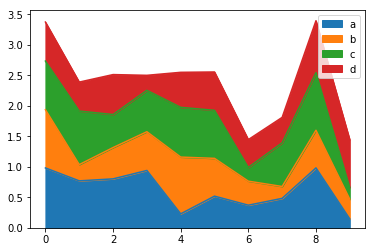

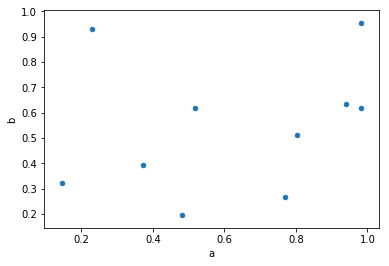

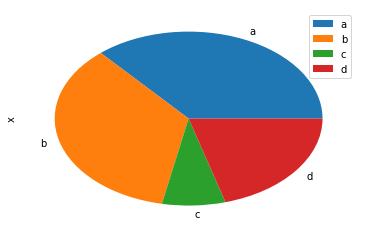

In [46]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

df.plot.scatter(x='a', y='b')

#df.diff.hist(bins=20) ## not working 
df = pd.DataFrame(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], columns=['x'])
df.plot.pie(subplots=True)

## Pandas I/O operations

In [47]:
df=pd.read_csv("temp.csv")
#df=pd.read_csv("temp.csv",index_col=['S.No'])
print (df.columns)

Index(['GPS_Latitude', 'GPS_Longitude', 'RawLatitude', 'RawLongitude',
       'CorrectedLatitude', 'CorrectedLongitude', 'DistanceCorrected2GPS',
       'DiffCorrectLatRawLat', 'DiffCorrectLongRawLong', 'DistanceRaw2GPS',
       'DiffRawLatGpsLat', 'DiffRawLongGpsLong', 'DistanceRaw2Corrected',
       'ImageType'],
      dtype='object')


In [48]:
df = pd.read_csv("temp.csv", dtype={'DistanceRaw2GPS': np.float64}) ##Converters
print (df.dtypes)

GPS_Latitude              float64
GPS_Longitude             float64
RawLatitude               float64
RawLongitude              float64
CorrectedLatitude         float64
CorrectedLongitude        float64
DistanceCorrected2GPS     float64
DiffCorrectLatRawLat      float64
DiffCorrectLongRawLong    float64
DistanceRaw2GPS           float64
DiffRawLatGpsLat          float64
DiffRawLongGpsLong        float64
DistanceRaw2Corrected     float64
ImageType                  object
dtype: object


In [49]:
df=pd.read_csv("temp.csv", names=['GPS_Latitude', 'DistanceRaw2GPS'])
df=pd.read_csv("temp.csv", skiprows=2) #skip initial 2 rows
#df


In [50]:
## sparcify data
ts = pd.Series(np.random.randn(10))
ts[2:-2] = np.nan  # from 2 nd row to last 2 rows nan the values
sts = ts.to_sparse()
print (sts)
print (sts.to_dense())
#print("Total score for \n ", ts, "is \n", sts)

### Python Pandas - Caveats & Gotchas part remaining

0   -0.031413
1    0.101623
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8   -0.438319
9   -0.509120
dtype: float64
BlockIndex
Block locations: array([0, 8], dtype=int32)
Block lengths: array([2, 2], dtype=int32)
0   -0.031413
1    0.101623
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8   -0.438319
9   -0.509120
dtype: float64
